# Economic Complexity and Product Complexity

Economies grow by upgrading the products they produce and export. The technology, capital, institutions, and skills needed to make newer products are more easily adapted from some products than from others. Here, we study this network of relatedness between products, or “product space,” finding that more-sophisticated products are located in a densely connected core whereas less-sophisticated products occupy a less-connected periphery. Empirically, countries move through the product space by developing goods close to those they currently produce. Most countries can reach the core only by traversing empirically infrequent distances, which may help explain why poor countries have trouble developing more competitive exports and fail to converge to the income levels of rich countries.


- Hausmann, R., Hidalgo, C. A., Bustos, S., Coscia, M., Simoes, A., & Yıldırım, M. (2013). The Atlas of Economic Complexity: Mapping Paths to Prosperity (Part 1). Retrieved from https://growthlab.cid.harvard.edu/files/growthlab/files/atlas_2013_part1.pdf
- Hidalgo, C. A., Klinger, B., Barabasi, A.-L., & Hausmann, R. (2007). The Product Space Conditions the Development of Nations. Science, 317(5837), 482–487. http://doi.org/10.1126/science.1144581

https://github.com/cid-harvard/py-ecomplexity

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import scipy.sparse.linalg 
import scipy
from scipy import sparse
from ECI2 import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 4 digit sitc trade data

/Users/datalab/anaconda3/lib/python3.7/site-packages/ecomplexity/ComplexityData.py:54: UserWarning: Duplicate values exist, keeping the first occurrence
  'Duplicate values exist, keeping the first occurrence')


2017


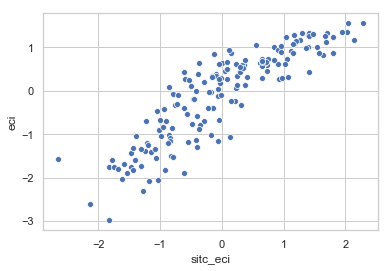

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from ecomplexity import ecomplexity

# Import trade data from CID Atlas
data = pd.read_csv('../data/country_partner_sitcproduct4digit_year_2017.zip', compression="zip", low_memory=False)
data.head()

# Calculate eci's
data = data[['year','location_code','sitc_product_code','export_value','sitc_eci']]
data = data[data.year==data.year.max()]
trade_cols = {'time':'year', 'loc':'location_code', 'prod':'sitc_product_code', 'val':'export_value'}
cdata = ecomplexity(data, trade_cols)
cdata = cdata[['location_code','eci','sitc_eci']].drop_duplicates(['location_code'])

# Compare against Atlas
sns.scatterplot('sitc_eci','eci', data=cdata)

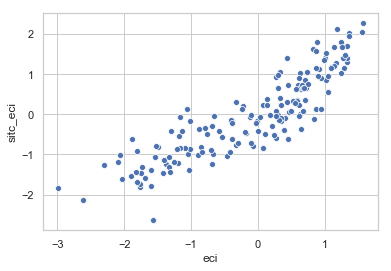

In [143]:
# Compare against Atlas
sns.scatterplot('eci','sitc_eci', data=cdata)

In [121]:
cdata[:10]

location_code       eci  sitc_eci
0               ABW  0.835738       NaN
4631            AFG -1.378222 -1.237445
9680            AGO -1.764049 -1.822037
18791           AIA  1.165619       NaN
19869           ALB -0.688075 -0.288839
25952           AND  0.328331  1.066444
28707           ANS  0.606416  0.734075
30727           ARE  0.460639  0.057493
38576           ARG -0.386276 -0.156561
44106           ARM  0.000319 -0.416436

In [124]:
# To download gdp data from wordbank 
# https://data.worldbank.org/indicator/ny.gdp.pcap.cd?most_recent_year_desc=true
df_gdp = pd.read_csv('./GDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089.csv', sep = '\t')
year =2017
df_g = df_gdp[['Country Code', str(year)]]
gdp_dict =dict(zip(df_g['Country Code'],df_g[str(year)]))
cdata['gdp'] = [gdp_dict[name] if name in gdp_dict else 0.0 for name in cdata['location_code']]

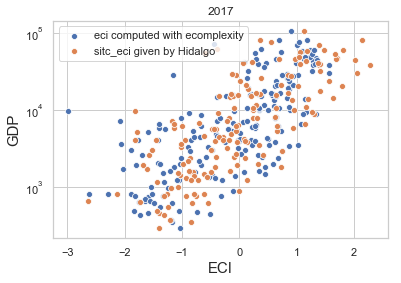

In [142]:
# Compare against Atlas
df = cdata[cdata['gdp'] >0]
sns.scatterplot('eci','gdp', data=df, label = 'eci computed with ecomplexity')
sns.scatterplot('sitc_eci','gdp', data=df, label = 'sitc_eci given by Hidalgo')
plt.yscale('log')
plt.legend()
plt.xlabel('ECI', fontsize = 15)
plt.ylabel('GDP', fontsize = 15)
plt.title('2017');

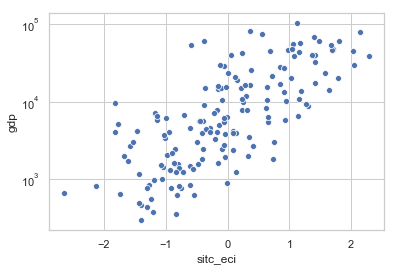

In [128]:
# Compare against Atlas
df = cdata[cdata['gdp'] >0]
sns.scatterplot('sitc_eci','gdp', data=df)
plt.yscale('log');

In [88]:
df = pd.read_csv('../data/country_partner_sitcproduct4digit_year_2017.zip',compression="zip", low_memory=False)

In [89]:
len(df)

4672972

In [90]:
df[:3]

location_id  partner_id  product_id  year  export_value  import_value  \
0            0           7         696  2017             0         11321   
1            1           7         696  2017             0       9772031   
2            2           7         696  2017             0       1013881   

   sitc_eci  sitc_coi location_code location_name_short_en partner_code  \
0  0.633293 -0.044210           ABW                  Aruba          ARE   
1 -1.237445 -0.921007           AFG            Afghanistan          ARE   
2 -1.822037 -1.232933           AGO                 Angola          ARE   

  partner_name_short_en sitc_product_code sitc_product_name_short_en  
0  United Arab Emirates              0484            Bakery products  
1  United Arab Emirates              0484            Bakery products  
2  United Arab Emirates              0484            Bakery products

In [91]:
df = df.drop_duplicates()
len(df)
df_year = df.fillna(0)

In [112]:
len(df_year)

4672972

In [93]:
df_gdp = pd.read_csv('./GDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089.csv', sep = '\t')
year =2017
df_g = df_gdp[['Country Code', str(year)]]
gdp_dict =dict(zip(df_g['Country Code'],df_g[str(year)]))

In [94]:
eci_hidago = df_year[['sitc_eci','location_code']].drop_duplicates()

In [95]:
eci_hidago_dict =dict(zip(eci_hidago['location_code'],eci_hidago['sitc_eci']))

In [96]:
x = list(df_year["location_code"])
y = list(df_year["sitc_product_code"])
data = np.array(list(df_year["export_value"]))
sx = list(set(x))
sy =list(set(y))
dx = dict(zip(sx,range(len(sx))))
dy = dict(zip(sy,range(len(sy))))
x1 = [dx[xi] for xi in x]
y1 = [dy[yi] for yi in y]

In [117]:
len(y1), len(x), len(data)

(470, 4672972, 4672972)

In [97]:
# 构建出口矩阵
M = sparse.csc_matrix((data,(x1,y1)),(len(dx),len(dy)))

In [118]:
M

<235x769 sparse matrix of type '<class 'numpy.int64'>'
	with 154175 stored elements in Compressed Sparse Column format>

In [98]:
#计算RCA
R = RCA_sparse(M)

==Time 0.21==


/Users/datalab/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:282: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


In [99]:
R=R.toarray()
R[np.isnan(R)]=0.0

In [100]:
Mat_Dict = Get_eci_pci(np.matrix(R))
eci,pci = Mat_Dict['eci'],Mat_Dict['pci']

==Time 0.51==


In [101]:
#利用稀疏矩阵计算：
Dict = Get_eci_pci_sparse(sparse.csc_matrix(R))
eci_sparse,pci_sparse = Dict['eci'],Dict['pci']

==Time 0.09==


In [102]:
# 利用ecomplexity计算出来的结果
from ecomplexity import ecomplexity
from ecomplexity import proximity
time = [2017]*len(x)
trade_cols = {'time':'year', 'loc':'name', 'prod':'skill', 'val':'value'}
SData=pd.DataFrame({"year":time,'name':x,"skill":y,"value":data})
cdata = ecomplexity(SData, trade_cols)#使用过滤函数
res=pd.DataFrame({'name':list(cdata.name),"eci":list(cdata.eci)})
res = res.drop_duplicates()

/Users/datalab/anaconda3/lib/python3.7/site-packages/ecomplexity/ComplexityData.py:54: UserWarning: Duplicate values exist, keeping the first occurrence
  'Duplicate values exist, keeping the first occurrence')


2017


In [103]:
trade_cols = {'time':'year', 'loc':'location_code', 'prod':'sitc_product_code', 'val':'export_value'}
cdata2 = ecomplexity(df_year, trade_cols)

/Users/datalab/anaconda3/lib/python3.7/site-packages/ecomplexity/ComplexityData.py:54: UserWarning: Duplicate values exist, keeping the first occurrence
  'Duplicate values exist, keeping the first occurrence')


2017


In [104]:
res2=pd.DataFrame({'name':list(cdata2.location_code),"eci":list(cdata2.eci)})
res2 = res2.drop_duplicates()

In [105]:
y =[eci[dx[name]] for name in res.name]
y1 = [eci_sparse[dx[name]] for name in res.name]
y2 = [eci_hidago_dict[name] for name in res.name]
gdp = [gdp_dict[name] if name in gdp_dict else 0.0 for name in res.name]

In [106]:
total=pd.DataFrame({'name':list(res.name),
                    'gdp':gdp,
                    'eci_hidalgo_rep':y2,
                    "eci_ecomplexity_cal":list(res.eci),
                    'eci_mat':y,
                    'eci_sparse':y1})

In [107]:
total.head()

name           gdp  eci_hidalgo_rep  eci_ecomplexity_cal   eci_mat  \
0  ABW  25630.266490         0.633293             0.835738  0.012386   
1  AFG    556.302138        -1.237445            -1.378222 -1.617771   
2  AGO   4095.812942        -1.822037            -1.764049 -0.796055   
3  AIA      0.000000         0.940984             1.165619  0.277133   
4  ALB   4532.889198        -0.288839            -0.688075  0.153267   

   eci_sparse  
0    0.012386  
1   -1.617771  
2   -0.796055  
3    0.277133  
4    0.153267

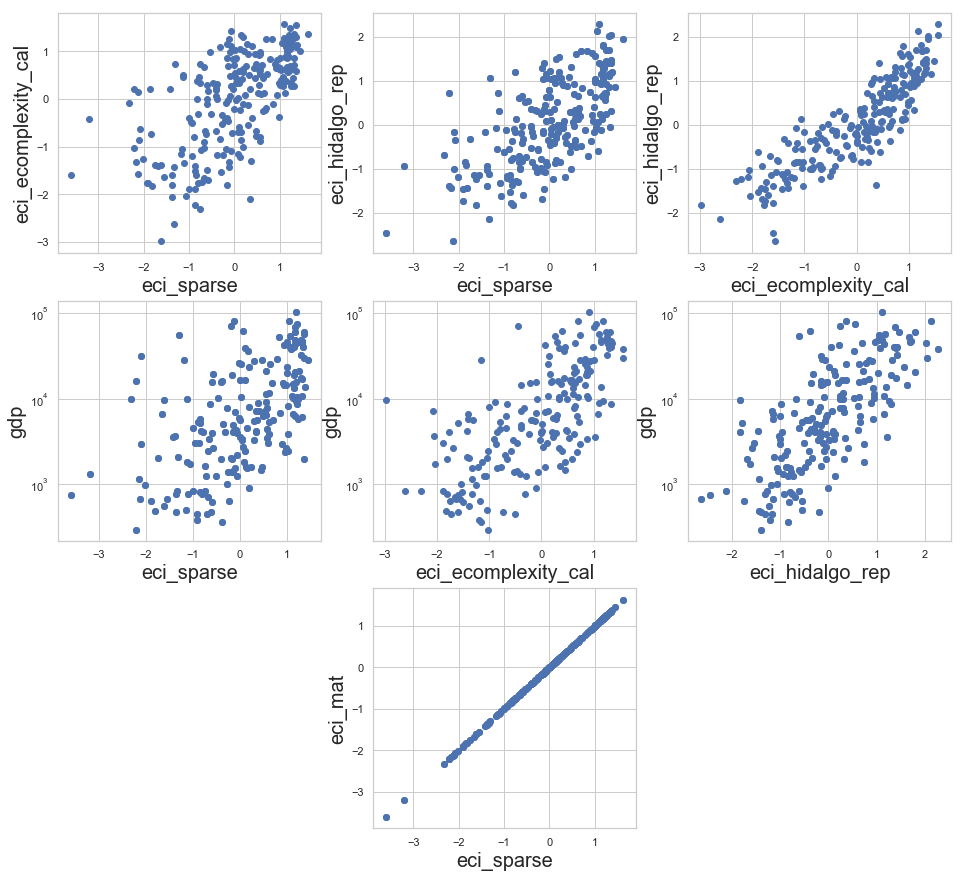

In [141]:
plt.figure(figsize=(16,15))

plt.subplot(338)
plot('eci_sparse', 'eci_mat')
plt.subplot(331)
plot('eci_sparse', 'eci_ecomplexity_cal')
plt.subplot(332)
plot('eci_sparse', 'eci_hidalgo_rep')
plt.subplot(333)
plot('eci_ecomplexity_cal', 'eci_hidalgo_rep')
plt.subplot(334)
plotGDP('eci_sparse', 'gdp')
plt.subplot(335)
plotGDP('eci_ecomplexity_cal', 'gdp')
plt.subplot(336)
plotGDP('eci_hidalgo_rep', 'gdp')


## sitc digit-2 data

In [ ]:
df = pd.read_csv('country_sitcproduct2digit_year.csv',low_memory=False)

In [4]:
year =2017
df_year = df[df['year']==year]
df_year = df_year.drop_duplicates()
df_year = df_year.fillna(0)

In [64]:
df_gdp = pd.read_csv('./GDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089.csv', sep = '\t')
df_g = df_gdp[['Country Code', str(year)]]
gdp_dict =dict(zip(df_g['Country Code'],df_g[str(year)]))

In [6]:
eci_hidago = df_year[['sitc_eci','location_code']].drop_duplicates()

In [7]:
eci_hidago_dict =dict(zip(eci_hidago['location_code'],eci_hidago['sitc_eci']))

In [8]:
x = list(df_year["location_code"])
y = list(df_year["sitc_product_code"])
data = np.array(list(df_year["export_value"]))
sx = list(set(x))
sy =list(set(y))
dx = dict(zip(sx,range(len(sx))))
dy = dict(zip(sy,range(len(sy))))
x1 = [dx[xi] for xi in x]
y1 = [dy[yi] for yi in y]

In [9]:
# 构建出口矩阵
M = sparse.csc_matrix((data,(x1,y1)),(len(dx),len(dy)))

In [10]:
#计算RCA
R = RCA_sparse(M)

==Time 0.03==


/Users/datalab/anaconda3/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(self.todense(), other)
/Users/datalab/anaconda3/lib/python3.7/site-packages/scipy/sparse/base.py:597: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)
/Users/datalab/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:208: RuntimeWarning: invalid value encountered in greater_equal
  res = self._with_data(op(self.data, other), copy=True)
/Users/datalab/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:282: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


In [11]:
R=R.toarray()
R[np.isnan(R)]=0.0

In [12]:
Mat_Dict = Get_eci_pci(np.matrix(R))
eci,pci = Mat_Dict['eci'],Mat_Dict['pci']

==Time 0.01==


In [13]:
#利用稀疏矩阵计算：
Dict = Get_eci_pci_sparse(sparse.csc_matrix(R))
eci_sparse,pci_sparse = Dict['eci'],Dict['pci']

==Time 0.01==


In [14]:
# 利用ecomplexity计算出来的结果
from ecomplexity import ecomplexity
from ecomplexity import proximity
time = [2017]*len(x)
trade_cols = {'time':'year', 'loc':'name', 'prod':'skill', 'val':'value'}
SData=pd.DataFrame({"year":time,'name':x,"skill":y,"value":data})
cdata = ecomplexity(SData, trade_cols)#使用过滤函数
res=pd.DataFrame({'name':list(cdata.name),"eci":list(cdata.eci)})
res = res.drop_duplicates()

2017


In [15]:
df_year = df[df['year']==year]
trade_cols = {'time':'year', 'loc':'location_code', 'prod':'sitc_product_code', 'val':'export_value'}
cdata2 = ecomplexity(df_year, trade_cols)

2017


In [16]:
res2=pd.DataFrame({'name':list(cdata2.location_code),"eci":list(cdata2.eci)})
res2 = res2.drop_duplicates()

In [65]:
y =[eci[dx[name]] for name in res.name]
y1 = [eci_sparse[dx[name]] for name in res.name]
y2 = [eci_hidago_dict[name] for name in res.name]
gdp = [gdp_dict[name] if name in gdp_dict else 0.0 for name in res.name]

In [66]:
total=pd.DataFrame({'name':list(res.name),
                    'gdp':gdp,
                    'eci_hidalgo_rep':y2,
                    "eci_ecomplexity_cal":list(res.eci),
                    'eci_mat':y,
                    'eci_sparse':y1})

In [67]:
total.head()

name           gdp  eci_hidalgo_rep  eci_ecomplexity_cal   eci_mat  \
0  ABW  25630.266490         0.633293            -0.428741 -0.430580   
1  AFG    556.302138        -1.237445            -1.080686 -1.083838   
2  AGO   4095.812942        -1.822037            -1.478833 -1.482787   
3  AIA      0.000000         0.940984             1.044546  1.045672   
4  ALB   4532.889198        -0.288839            -0.195837 -0.197208   

   eci_sparse  
0   -0.430580  
1   -1.083838  
2   -1.482787  
3    1.045672  
4   -0.197208

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
#for key in [ "eci_hidalgo_rep","eci_ecomplexity_cal","eci_mat","eci_sparse"]:

<Figure size 360x360 with 0 Axes>

In [80]:
def plot(key1, key2):
    # [ "eci_hidalgo_rep","eci_ecomplexity_cal","eci_mat","eci_sparse"]
    plt.scatter(total[key1], total[key2])
    plt.xlabel(key1,fontsize=20)
    plt.ylabel(key2,fontsize=20)
    #plt.show()
    
def plotGDP(key1, key2):
    df = total[total['gdp'] >0]
    plt.scatter(df[key1], df[key2])
    plt.xlabel(key1,fontsize=20)
    plt.ylabel(key2,fontsize=20)
    plt.yscale('log')

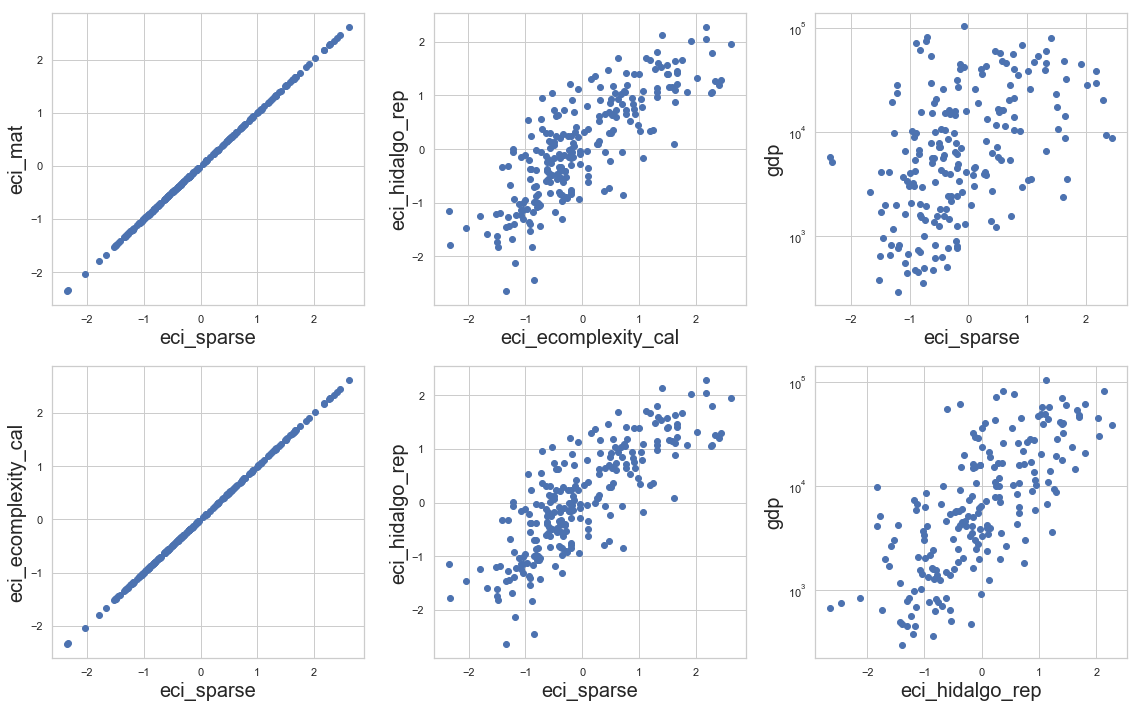

In [85]:
plt.figure(figsize=(16,10))

plt.subplot(231)
plot('eci_sparse', 'eci_mat')
plt.subplot(234)
plot('eci_sparse', 'eci_ecomplexity_cal')
plt.subplot(232)
plot('eci_ecomplexity_cal', 'eci_hidalgo_rep')
plt.subplot(235)
plot('eci_sparse', 'eci_hidalgo_rep')
plt.subplot(233)
plotGDP('eci_sparse', 'gdp')
plt.subplot(236)
plotGDP('eci_hidalgo_rep', 'gdp')
plt.tight_layout()

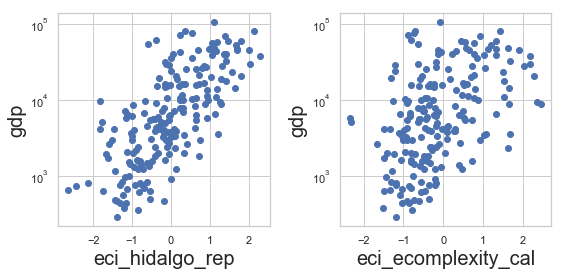

In [87]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plotGDP('eci_hidalgo_rep', 'gdp')
plt.subplot(122)
plotGDP('eci_ecomplexity_cal', 'gdp')
plt.tight_layout()